In [1]:
from pandas import Series, DataFrame
import pandas as pd

chicago = pd.read_csv('chicago_crimes.csv', dtype = unicode).dropna()

In [2]:
chicago[:10]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/4/14 9:30,010XX E 47TH ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,FALSE,...,4,39,04B,1183896,1874058,2014,2/4/16 6:33,41.8095966,-87.60101633,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/02 9:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,FALSE,...,29,25,14,1139530,1897135,2002,4/15/16 8:55,41.87384547,-87.76318349,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,3/31/05 11:46,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",TRUE,...,39,13,15,1152801,1933422,2005,4/15/16 8:55,41.97316782,-87.71349527,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,6/30/06 16:44,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,TRUE,...,27,23,26,1153483,1905125,2006,4/15/16 8:55,41.89550508,-87.71174182,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/06 23:05,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,TRUE,...,24,25,16,1144509,1896222,2006,4/15/16 8:55,41.87124787,-87.74492573,"(41.871248, -87.744926)"
5,6162396,2182182,HH429064,6/9/02 5:00,045XX N ASHLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,TRUE,...,47,3,18,1164839,1930205,2002,4/15/16 8:55,41.96409271,-87.66932057,"(41.964093, -87.669321)"
6,720409,2839797,HJ500224,7/16/03 17:45,016XX N MAPLEWOOD AVE,620,BURGLARY,UNLAWFUL ENTRY,PARK PROPERTY,FALSE,...,1,24,5,1159114,1910852,2003,4/15/16 8:55,41.91110663,-87.69090291,"(41.911107, -87.690903)"
7,2251410,7313423,HS117845,1/12/10 22:30,015XX S SANGAMON ST,810,THEFT,OVER $500,STREET,FALSE,...,25,28,6,1170443,1892718,2010,2/4/16 6:33,41.86110533,-87.64981486,"(41.861105, -87.649815)"
9,4676604,3339646,HK381485,5/22/04 19:07,001XX N STATE ST,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,TRUE,...,42,32,6,1176352,1900927,2004,4/15/16 8:55,41.88350019,-87.6278767,"(41.8835, -87.627877)"
11,5712246,6032714,HP131858,6/11/07 4:00,072XX S PAULINA ST,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,FALSE,...,17,67,10,1166265,1856717,2007,4/15/16 8:55,41.76240481,-87.6661773,"(41.762405, -87.666177)"


In [3]:
# Group by types of crime, location
chicago_grouped = chicago.groupby(['District', 'Primary Type'])['Primary Type'].count()
chicago_grouped

# Top primary type per district
chicago_unstacked = chicago_grouped.unstack('Primary Type').T.idxmax()
chicago_unstacked

District
1         THEFT
10      BATTERY
11    NARCOTICS
12        THEFT
14        THEFT
15    NARCOTICS
16        THEFT
17        THEFT
18        THEFT
19        THEFT
2       BATTERY
20        THEFT
22        THEFT
24        THEFT
25      BATTERY
3       BATTERY
4       BATTERY
5       BATTERY
6       BATTERY
7       BATTERY
8         THEFT
9       BATTERY
dtype: object

It is worth noting that Districts 11 and 15 have Narcotics as their top crime. Should additional police resources be placed towards a narcotics task force for those districts? How are they currently fighting narcotics?

In [4]:
chicago_grouped2 = chicago.groupby(['Primary Type', 'Description', 'District'])['Description'].count()
chicago_grouped2.sort_values(ascending=False)[:20]

Primary Type     Description              District
BATTERY          DOMESTIC BATTERY SIMPLE  7           409
                                          11          383
                                          6           355
                                          8           334
                                          25          328
                                          4           318
THEFT            FROM BUILDING            18          314
BATTERY          DOMESTIC BATTERY SIMPLE  3           309
THEFT            $500 AND UNDER           12          309
BATTERY          DOMESTIC BATTERY SIMPLE  15          293
                                          5           268
THEFT            $500 AND UNDER           19          259
                                          14          259
                 FROM BUILDING            1           257
                 OVER $500                12          255
                 $500 AND UNDER           25          254
                     

In [5]:
district_mask = chicago['District']

cross_tab = pd.crosstab(chicago['Primary Type'][district_mask], chicago['Description'][district_mask])
cross_tab


""


Populating the interactive namespace from numpy and matplotlib


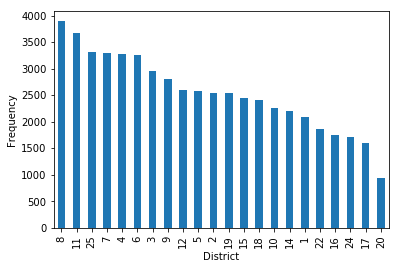

In [6]:
from matplotlib import pyplot as plt
%pylab inline

crimes_per_district = chicago['District'].value_counts()
crimes_per_district.plot(kind = 'bar')
plt.xlabel('District')
plt.ylabel('Frequency')

There is not one district that really stands out well beyond the others, but District 8 and 11 do lead when performing value_counts(). In doing additional research, District 8 houses Chicago Midway Airport, so does more crime occur near the airport? Maybe criminals are taking advantage and performing minor crimes on tourists? District 11 includes Garfield Park.

In [18]:
# Grouping by district and year to see crime over time
chicago_grouped3 = chicago.groupby(['District', 'Year'])['Primary Type'].count()
df = chicago_grouped3.unstack()
df.index = df.index.map(int)
df.sort_index(inplace=True)
del df['2001']
del df['2017']

In [8]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# years = list(df.columns.values)
# crime = list(df.values)

# trace = go.Scatter(
#     x = years,
#     y = crime,
#     name = "Crime per Year",
#     line = dict(color = '#17BECF'),
#     opacity = 0.8)

# data = [trace]

# # layout = dict(
# #     title='Crime per District by Year (2002-2016)',
# #     xaxis=dict(
# #         rangeselector=dict(
# #             buttons=list([
# #                 dict(count=1,
# #                      label='1m',
# #                      step='month',
# #                      stepmode='backward'),
# #                 dict(count=6,
# #                      label='6m',
# #                      step='month',
# #                      stepmode='backward'),
# #                 dict(step='all')
# #             ])
# #         ),
# #         rangeslider=dict(),
# #         type='date'
# #     )
# # )

# fig = dict(data=data)
# py.iplot(fig, filename = "Crime per District by Year (2002-2016)")

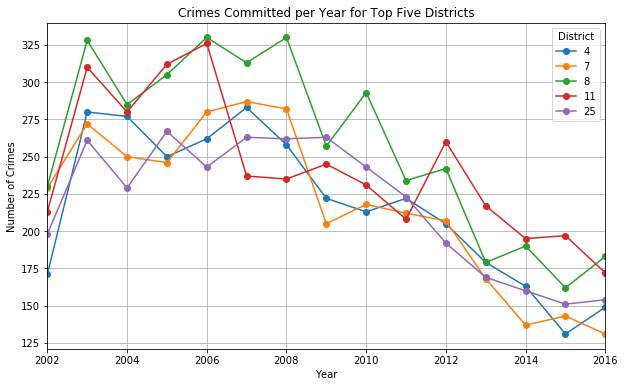

In [35]:
sums = df.sum(axis=1)
new_sums = [2070, 2533, 2932, 3265, 2562, 3228, 3267, 3861, 2793, 2249, 3638, 2578, 2185, 2436, 1732, 1584, 2396, 2518, 943, 1851, 1691, 3278]
df['Sum'] = new_sums
df['Sum'].sort_values(ascending=False)
df_top5 = df[df['Sum'] >= 3265]
pylab.rcParams['figure.figsize'] =(10,6)
df_top5.T.iloc[0:-1].plot(marker = 'o')
plt.grid()
xlabel('Year')
ylabel('Number of Crimes')
title('Crimes Committed per Year for Top Five Districts')

In [10]:
mask = chicago['District']
dist_8 = chicago[mask == '8']
dist_11 = chicago[mask == '11']
dist_25 = chicago[mask == '25']
dist_7 = chicago[mask == '7']
dist_4 = chicago[mask == '4']